## Convolutional Neural Network (CNN) Implimentation for facial recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Load the facial dataset <i>fetch_lfw_people</i> from sklearn, with a filter that each person has at least 20 images. 

In [2]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=30,resize=0.4)

Plot first 15 faces in the dataset

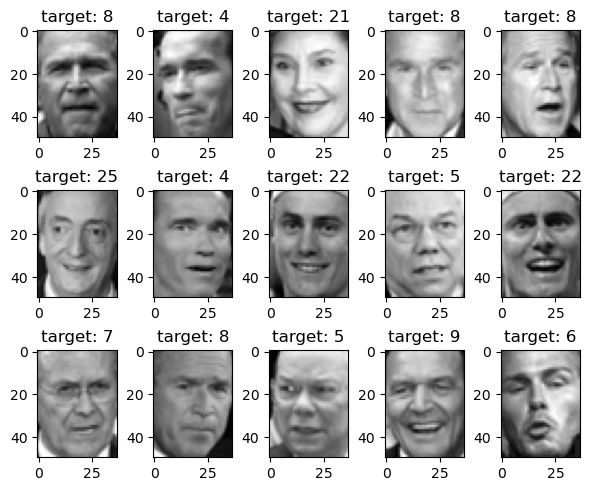

In [3]:
fig, axes = plt.subplots(3, 5)
plt.subplots_adjust(right=1, top=1, hspace=.5)
for i in range(15):
    axes.flat[i].imshow(people['images'][i],cmap='gray')
    axes.flat[i].title.set_text('target: {}'.format(people['target'][i]))
plt.show()

In [4]:
#Size of the data
people['images'].shape

(2370, 50, 37)

In [5]:
#Number of target
len(np.unique(people['target']))

34

The dataset contains 2749 images with size 62\*47 comes from 52 individuals. <br>

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import L2
from tensorflow.keras.models import clone_model
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Separate the dataset into training, validation, testing set at a ratio 80%:10%:10%

In [7]:
np.random.seed(0)
X=people['images']
y=people['target']

n, w, h = people['images'].shape
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, train_size=0.5)
X_train = X_train.reshape((X_train.shape[0], w, h, 1))
X_val = X_val.reshape((X_val.shape[0], w, h, 1))
X_test = X_test.reshape((X_test.shape[0], w, h, 1))

#Input shape
in_shape = X_train.shape[1:]
#Number of Class
n_classes = len(np.unique(y_train))

### Define CNN Model and optimizer<br>
Structure:
<ol>
    <li>Convolutional Layer with 32 filters of size 3*3, with same padding and ReLU activation.</li>
    <li>Max Pooling layer with filter size 2*2.</li>
    <li>Convolutional Layer with 128 filters of size 3*3, with same padding and ReLU activation.</li>
    <li>Max Pooling layer with filter size 2*2.</li>
    <li>Flatten layer.</li>
    <li>Layer with 1600 hidden nodes and ReLU activation.</li>
    <li>Layer with 400 hidden nodes and ReLU activation.</li>
    <li>Dropout layer with paraeters 0.5.</li>
    <li>Output Layer, with softmax activation and L2 regularization.</li>
</ol>
We use Adam optimizer and cross entropy loss for the classification problem.

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax',activity_regularizer=L2(0.001)))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 37, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 18, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 18, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 9, 128)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 13824)             0         
                                                                 
 dense (Dense)               (None, 1024)              1

Train the Model

In [10]:
training_loss=[]
validation_loss=[]
training_accuracy=[]
validation_accuracy=[]

n_epochs = 30

for epoch in range(n_epochs):
    print("Epoch: {}/{}".format(epoch+1,n_epochs))
    
    #Train the model
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=64, verbose=1)
    
    #Train loss and training accuracy
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    training_loss.append(train_loss)
    training_accuracy.append(train_acc)
    
    #Validation loss and validation accuracy
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    validation_loss.append(val_loss)
    validation_accuracy.append(val_acc)   
    

Epoch: 1/30
30/30 [==============================] - 2s 65ms/step - loss: 3.1964 - accuracy: 0.2089 - val_loss: 3.1191 - val_accuracy: 0.2321
Epoch: 2/30
30/30 [==============================] - 2s 63ms/step - loss: 3.0293 - accuracy: 0.2268 - val_loss: 2.8502 - val_accuracy: 0.2616
Epoch: 3/30
30/30 [==============================] - 2s 63ms/step - loss: 2.7306 - accuracy: 0.2938 - val_loss: 2.5626 - val_accuracy: 0.3165
Epoch: 4/30
30/30 [==============================] - 2s 63ms/step - loss: 2.3333 - accuracy: 0.3613 - val_loss: 2.1676 - val_accuracy: 0.4093
Epoch: 5/30
30/30 [==============================] - 2s 63ms/step - loss: 1.9075 - accuracy: 0.4763 - val_loss: 1.8913 - val_accuracy: 0.4768
Epoch: 6/30
30/30 [==============================] - 2s 63ms/step - loss: 1.5587 - accuracy: 0.5617 - val_loss: 1.6595 - val_accuracy: 0.5612
Epoch: 7/30
30/30 [==============================] - 2s 64ms/step - loss: 1.2590 - accuracy: 0.6487 - val_loss: 1.4538 - val_accuracy: 0.6160
Epoch:

Evaluation of the model

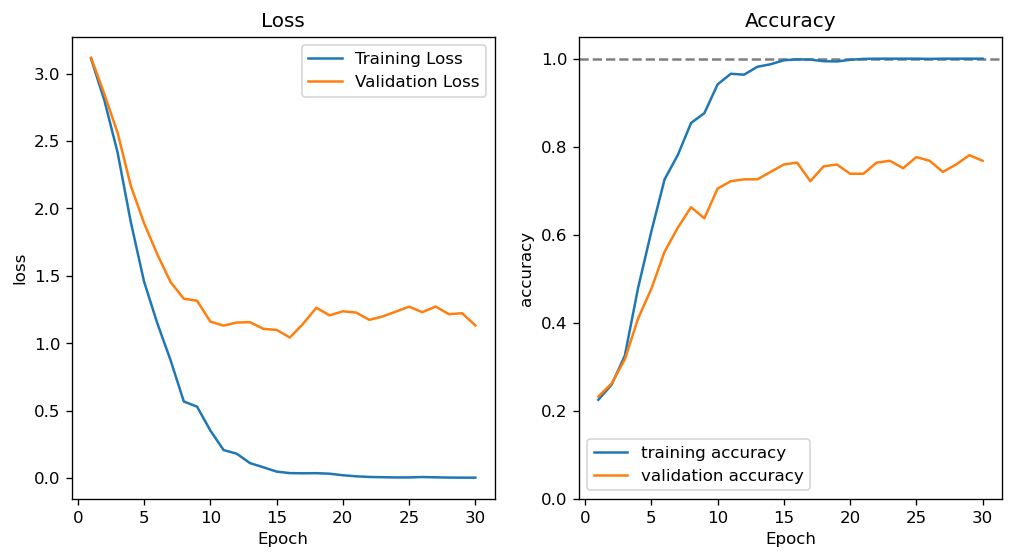

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), dpi=120)

ax1.plot(np.arange(n_epochs)+1,training_loss,label="Training Loss")
ax1.plot(np.arange(n_epochs)+1,validation_loss,label="Validation Loss")
ax1.set_title("Loss")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('loss')
ax1.legend()

ax2.axhline(y=1, color="black", linestyle="--", alpha=0.5)
ax2.plot(np.arange(n_epochs)+1,training_accuracy,label="training accuracy")
ax2.plot(np.arange(n_epochs)+1,validation_accuracy,label="validation accuracy")
ax2.set_title("Accuracy")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('accuracy')
ax2.set_ylim(0,1.05)
ax2.legend()

plt.savefig("images/ConvNet.png")

Testing accuracy of the best model (model with least validation loss)

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
test_acc

0.8059071898460388

In [13]:
model.save("models/ConvNet")

INFO:tensorflow:Assets written to: ConvNet/assets


INFO:tensorflow:Assets written to: ConvNet/assets
